# Day & Night Image Classification Model

In [80]:
## Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import helpers

#### Setting up the data directories

In [81]:
## Image dataset directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

#### Loading the datasets
These first few lines of code will load the training day/night images and store all of them in a variable, IMAGE_LIST. This list contains the images and their associated label ("day" or "night"). For example, the first image-label pair in IMAGE_LIST can be accessed by index:  IMAGE_LIST[0][:].


In [82]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)

### Visualizing the dataset

In [83]:
# Select an image and its label by list index
image_index = 0
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]
print("SHAPE:",selected_image.shape,"\nLABEL:", selected_label)

SHAPE: (458, 800, 3) 
LABEL: day


### Preprocessing the data

In [84]:
## Standardize the input images
def standardize_output(image):
    return cv2.resize(image,(1100,600))

In [85]:
## Encode the images, by assigning 0/1 to night/day
def encode(label):
    if label=='night':
        return 0
    return 1

In [86]:
## Generate a standardized list of images
# Input : image-label pairs
# Output: list of **standardized** images which are of same size and have numerical labels attached
def standardize(image_list):
    output = []
    for i in image_list:
        image , label = i[0], i[1]
        output.append((standardize_output(image), encode(label)))
    return output

In [87]:
## Standardize images by invoking the above functions on real data
STANDARDIZED_LIST = standardize(IMAGE_LIST)

#### Visualize the Standardized Data

Text(0.5,1,'0')

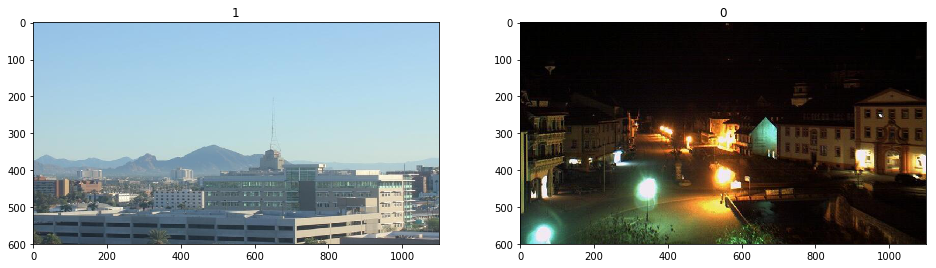

In [88]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.imshow(STANDARDIZED_LIST[1][0])
ax1.set_title(STANDARDIZED_LIST[1][1])

ax2.imshow(STANDARDIZED_LIST[234][0])
ax2.set_title(STANDARDIZED_LIST[234][1])

### Feature Extraction
Measurable component of the image that helps the classifier distinguish it from other images.

In [89]:
## Calculate average brightness of an image
def avg_brightness(image):
    # convert RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    sum_value_channel = np.sum(hsv_image[:,:,2])
    img_area = 600*1100
    return sum_value_channel/img_area

### Classification

In [90]:
def classify(image):
    avg = avg_brightness(image)
    predicted_label = 0 #default
    threshold = 100.0 #arbitrarily
    if(avg > threshold):
        predicted_label=1
    return predicted_label

### Testing

In [94]:
import random
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)
random.shuffle(STANDARDIZED_TEST_LIST)

In [95]:
def misclassified_images(test_images):
    misclass=[]
    for i in test_images:
        img,true_label=i[0],i[1]
        predicted_label=classify(img)
        if(predicted_label!=true_label):
            misclass.append((img,predicted_label))
    return misclass

### Accuracy

In [97]:
total = len(STANDARDIZED_TEST_LIST)
wrong = len(misclassified_images(STANDARDIZED_TEST_LIST))
correct = total - wrong
print("ACCURACY = ", correct/total)
print("NUMBER OF MISCLASSIFIED IMAGES = ",wrong)
print("TOTAL IMAGES = ",total)

ACCURACY =  0.925
NUMBER OF MISCLASSIFIED IMAGES =  12
TOTAL IMAGES =  160
